# Summary Statistics

Summary statistics are numerical values calculated from sample data that measure some characteristic about the data. Most people use the **average** of the data as the standard summary statistic; for instance, when receiving their exam scores, students will usually ask what the class average was for the exam. The average is also the most commonly used summary statistic by data scientists. Most statisticians use the term **sample mean** for this statistic, and often refer to it as simply the **mean**, but this can create confusion with another type of mean for random data: the **ensemble mean**, which is also usually just called the **mean**, and which is introduced in Chapter ZZ.

Because of this ambiguity in the **mean**ing of the word **mean**, I will use the term *average* to refer to the value that is computed from data. 

When teaching a class on this subject, I usually ask the class: "What does the **average** or **sample mean** mean?". Here are some of the common answers:

1. The value that most of the data is centered around
2. The value that is most likely to occur
3. The value that has minimum distance from every value
4. The value that divides group into 2 sets of equal size 

Only one of these descriptions of the average is always accurate, and even then the description is ambiguous. 

To understand average (and also some other summary statistics), we first have to understand that representing data by a summary statistic results in errors, and we can use these errors to help choose a "good" summary statistic.

Let $d_0, d_1, \ldots, d_{N-1}$ be a set of numerical data points, and let $\nu$ be a summary decision statistic. 

The *error* $e_i$ between data point $d_i$ and $\nu$ is simply $e_i= d_i-\nu$. Note that the error may be positive or negative.

Intuitively, we should try to choose $\nu$ to minimize the errors to the data. However, how to do this is not entirely clear because we have many different errors, and if we adjust the value of $\nu$ to decrease the error to one data point, that may increase the error to another data point. 

The typical way to overcome this problem is to combine the errors together in some way. The most obvious way to combine them is to just add them up. However, we will shortly see that this has some problems, so let's go ahead and introduce four different ways to combine the errors. Since the errors depend on the choice of summary statistic, $\nu$, we write these combinations as functions of $\nu$:

**1. Sum of errors:** 
\begin{equation*}
E_s(\nu) = \sum_{i=0}^{N-1} e_i
\end{equation*}
**2. Number of non-zero error values:**
\begin{equation*}
E_0(\nu) = \sum_{i=0}^{N-1} \mathbf{1}_{\mathbb{R} - \{0\}}(e_i)
\end{equation*}
(This uses an indicator function to count the number of values that are not equal to $\nu$.)

**3. Sum of absolute errors:**
\begin{equation*}
E_1(\nu) = \sum_{i=0}^{N-1} \left\vert e_i \right \vert
\end{equation*}
**4. Sum of squared errors:**
\begin{equation*} 
E_2(\nu) = \sum_{i=0}^{N-1} \left( e_i \right )^2
\end{equation*}

Let's plot each of these errors as a function of the summary statistic $\nu$ for a simple data set: $D= \{-1,-1,0,2,5\}$. I have also plotted the data using star markers, and the repeated data points have been vertically offset, so we can see both data points.

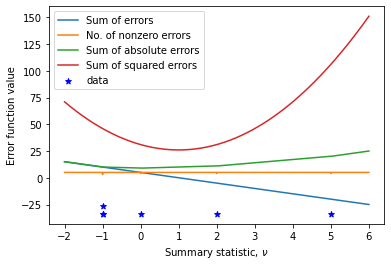

In [1]:
# Plotting different types of error functions. An experiment
import matplotlib.pyplot as plt
import numpy as np

# For clarity, store the different error metrics in different variables.
# Initialize them here
sum_errors = 0
num_nonzero_errors = 0
sum_abs_errors = 0
sum_square_errors = 0


nus = np.linspace(-2, 6, 801)  # If we want exact resolution of 8/800=0.01, need to
# include one extra point at 8
D = [-1, -1, 0, 2, 5]
for d in D:
    sum_errors += d - nus
    num_nonzero_errors += (d - nus) != 0
    sum_abs_errors += np.abs(d - nus)
    sum_square_errors += (d - nus) ** 2

plt.plot(nus, sum_errors, label="Sum of errors")
plt.plot(nus, num_nonzero_errors, label="No. of nonzero errors")
plt.plot(nus, sum_abs_errors, label="Sum of absolute errors")
plt.plot(nus, sum_square_errors, label="Sum of squared errors")

# Plot the data as markers
ymin, ymax = plt.ylim()
plt.scatter(D, ymin * np.ones(5), marker="*", label="data", color="b")
# Plot the repeated value at -1 as a second marker:
plt.scatter(D[0], ymin + 7, marker="*", color="b")

plt.xlabel(r"Summary statistic, $\nu$")
plt.ylabel("Error function value")
plt.legend();

Since $E_0$ and $E_1$ have a much smaller range than the other two values, let's also plot them separately:

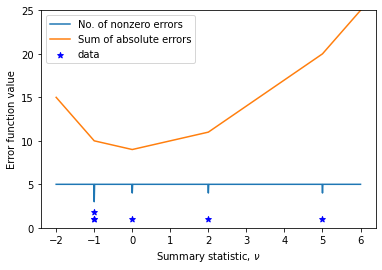

In [2]:
plt.plot(nus, num_nonzero_errors, label="No. of nonzero errors")
plt.plot(nus, sum_abs_errors, label="Sum of absolute errors")

# Plot the data as markers
plt.ylim(0, 25)
ymin = 1
plt.scatter(D, ymin * np.ones(5), marker="*", label="data", color="b")
# Plot the repeated value at -1 as a second marker:
plt.scatter(D[0], ymin + 0.8, marker="*", color="b")


plt.xlabel(r"Summary statistic, $\nu$")
plt.ylabel("Error function value")
plt.legend();

In [3]:
for i in range(9):
    print(nus[i * 100], sum_abs_errors[i * 100])

-2.0 15.0
-1.0 10.0
0.0 9.0
1.0 10.0
2.0 11.0
3.0 14.0
4.0 17.0
5.0 20.0
6.0 25.0


Before putting much thought into what this means, let's just find the minimums for these different error metrics. To do this, we will find the **index** of the minimum value of each metric using NumPy's `argmin` function. Then we will use that index value as the index of the `nus` array to determine the minimizing value of $\nu$:

In [4]:
nu_e = nus[np.argmin(sum_errors)]
nu_0 = nus[np.argmin(num_nonzero_errors)]
nu_1 = nus[np.argmin(sum_abs_errors)]
nu_2 = nus[np.argmin(sum_square_errors)]


print("         Metric         |     Minimizing value of nu")
print("____________________________________________________")
print("{:^24s}|{:^30s}".format("Sum or errors", str(nu_e)))
print("{:^24s}|{:^30s}".format("No. nonzero errors", str(nu_0)))
print("{:^24s}|{:^30s}".format("Sum of abs errors", str(nu_1)))
print("{:^24s}|{:^30s}".format("Sum of squared errors", str(nu_2)))

         Metric         |     Minimizing value of nu
____________________________________________________
     Sum or errors      |             6.0              
   No. nonzero errors   |             -1.0             
   Sum of abs errors    |             0.0              
 Sum of squared errors  |             1.0              


Interestingly, even for this very small data set, each of these error metrics results in a different minimizing value of $\nu$ on the range $\nu \in [-2,6]$. None of these metrics is inherently "correct" -- although we explain below why one of them is not useful.


From inspecting the graph and further thought, we can make the following observations:
1. The sum of errors decreases without bound as a function of $\nu$. Thus, there is not a minimizing value of $\nu$ if $\nu$  can be any real value. Because of this, the sum of errors is not useful in determining a summary statistic.
1. The number of nonzero errors is equal to the number of data points *except at each of the data points*. The number of nonzero errors at a data point is equal to the number of other data points. This metric will be minimized by setting $\nu$ equal to one of the data points that appears the most in the data set.
1. The sum of absolute errors is a continuous function that is a piecewise linear function. Furthermore, the linear segments connect between data points, between the minimum data points and $- \infty$, and between the maximum data point and $+ \infty$. It is not hard to see that the absolute error will increase linearly as $\nu$ is decreased from the minimum data point or increased from the maximum data point. For such a function, the minimizing value will be at one of the points where the linear segments intersect, which is at one of the data points. 
1. The sum of squared errors is a parabola. For this example, the minimum is not at one of the data points.

In the subsections below, we use the metrics $E_0$, $E_1$, and $E_2$ to define three common summary statistics.

## Minimizing the Number of Nonzero Errors 
Consider first $E_0$, the number of nonzero errors. As previously mentioned, $E_0$ is minimized at the data point that appears most often in the data set. This value is called the **mode**:


````{panels}
DEFINITION
^^^
mode
: The *mode* of a data set is a value in the data set that appears most often. As there may be more than one most common value, the mode of a data set is not unique.
````

Unfortunately, NumPy does not offer a function to calculate the mode directly. There are NumPy functions that can find the mode indirectly, but here we use two straight-forward approaches. Since we will often have our data in a Pandas dataframe, we can use the `mode` method of a Pandas dataframe. To convert our example data into a simple data frame, just pass it to Pandas' `DataFrame` function:

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(D)
df

,0
0,-1
1,-1
2,0
3,2
4,5


In [7]:
df.mode()

,0
0,-1


Pandas' `mode` function returns an indexed set of modes. Since this data set only has one mode, the index 0 value is that mode: -1.

If we are not working with Pandas already, an easier alternative is to use the `mode` function from the `stats` library of SciPy:

In [8]:
import scipy.stats as stats

stats.mode(D)

ModeResult(mode=array([-1]), count=array([2]))

As with Pandas, SciPy's `mode` function can return all of the modes. If we just want one value, we can just get the first element of the first return:

In [9]:
stats.mode(D)[0][0]

-1

**Exercise**

Consider the data set 

$$
D_2 = [-1,-1, 2,2]
$$

Copy and modify the code from 
above to calculate and plot the number of nonzero errors for this data set as a function of $\nu$. What values can be the mode? What values do scipy.stats and Pandas return for the mode?

## Minimizing the Sum of Absolute Errors

Now we turn to metric $E_1$, which is the sum of the absolute errors. Because $E_1$ is a continuous function of $\nu$, we can take its derivative to find its extreme values. Recall that
$$ E_1(\nu) = \sum_{i=0}^{N-1} \left\vert e_i \right \vert,$$
so its derivative is
\begin{align}
E_1'(\nu) &= \sum_{i=0}^{N-1} \operatorname{sgn} (e_i ) \\
&= \sum_{i=0}^{N-1} \operatorname{sgn} ( d_i-\nu ),
\end{align}
where $\operatorname{sgn}(x)$ is the *signum* function, which is defined as 
\begin{equation*}
\operatorname{sgn}(x) = \begin{cases}
-1, &x< 0 \\
1, & x > 0 \\
\mbox{undefined}, & x=0
\end{cases}
\end{equation*}
Let $L(\nu)$ be the number of data points $d_i$ such that $d_i < \nu$, and let $M(\nu)$ be the number of data points that are greater than $\nu$. Then the derivative of $E_1$ can be written as
\begin{equation*}
E_1'(\nu) = L(\nu) - M(\nu)
\end{equation*}
When $\nu$ is less than every data point, then $E_1'(\nu) = 0 - N = -N$; i.e., the slope of $E_1(\nu)=-N$. When $\nu$ is greater than every data point, then the slope of $E_1(\nu)$ is $E_1'(\nu) = N-0 = N$. At each data point in between, the slope of $E_1(\nu)$ changes by the number of data points in the data set that have that same value. The minimum value of $E_1(\nu)$ is achieved wherever the slope changes from negative to positive, which must occur wherever there are an equal number of data points on each side of $\nu$. We call this value the **median**:

````{panels}
DEFINITION
^^^
median
: The *median* of a data set is a value $m$ such that the number of data points that are less than $m$ is equal to the number of data points that are greater than $m$. For some data sets, there may be multiple values that satisify this criterion, so the median is not always unique.
````



When a data set has an even number of values ($N=2$), then any value between $d_{\frac{N}{2}-1}$ and $d_{\frac{N}{2}}$ will minimize the sum of absolute errors and is thus a median; in practice, the value that halfway between these two data points is often returned as the median:

$$
m= \frac{d_{\frac{N}{2}-1} + d_{\frac{N}{2}}}{2}
$$

NumPy and Pandas provide `median` functions and/or methods; the SciPy stats library does **not** have a median function.

In [10]:
np.median(D)

0.0

In [11]:
df.median()

0    0.0
dtype: float64

**Exercise**

Consider again the data set 

$$
D_2 = [-1,-1, 2,2]
$$

Copy and modify the code from 
above to calculate and plot the sum of absolute errors for this data set as a function of $\nu$. What values can be the median? What values do NumPy and Pandas return for the median?

## Minimizing the Sum of Squared Errors

Now consider the sum of square errors, $E_2$. As noted, this function defines a parabola in $\nu$, and we can find the extrema by taking the derivative of $E_2(v)$ with respect to $\nu$ and setting it equal to zero:

\begin{align}
E_2'(\nu) & = \frac{d}{d\nu} \sum_{i=0}^{N-1} \left( e_i \right )^2 \\
&= \sum_{i=0}^{N-1}  \frac{d}{d\nu} \left( e_i \right )^2 \\
&= \sum_{i=0}^{N-1}  2 \left( e_i \right ) \\
&= 2 \sum_{i=0}^{N-1}   \left( d_i - \nu \right ) \\
&= 2 \sum_{i=0}^{N-1} d_i - 2 N \nu 
\end{align}

Setting $E_2'(\nu)$ equal to zero yields:
\begin{align}
2 \sum_{i=0}^{N-1} d_i - 2 N \nu &=0 \\
 \sum_{i=0}^{N-1} d_i &= N \nu .
\end{align}
Solving for $\nu$ gives the minimizing value:
\begin{align}
\nu = \frac{1}{N} \sum_{i=0}^{N-1} d_i
\end{align}

Most people are familiar with this value: it is the **average** of the data:


````{panels}
DEFINITION
^^^
average
: The *average*, or *sample mean* of a data set $D= d_0, d_1, \ldots, d_{N-1}$ is a value $\mu$ defined by
\begin{align}
\mu = \frac{1}{N} \sum_{i=0}^{N-1} d_i.
\end{align}
````

Thus we see that the average is the value that minimizes the total squared-error to the data. Unlike the median or the mode, the average is unique.

Numpy and Pandas provide `mean` methods to calculate the average (sample mean); again, scipy.stats does **not** provide a mean method, since it is already available in NumPy:

In [12]:
np.mean(D)

1.0

In [13]:
df.mean()

0    1.0
dtype: float64

## Some Remarks on Mode, Median, and Average

As our example illustrates, the mode, median, and average for a data set can all be different values. The mode is usually not meaningful if the data take on real values: usually, there are not any significant number of repeats in the data. For this reason, the mode is the summary statistic that we will use least.

As previously mentioned, the average is the most commonly used summary statistic. It is widely accepted for this purpose by the scientific community. Many people consider the median to be a more robust statistic because it is less sensitive to extreme values (such as outliers). For example, suppose we inserted the value 100 into the example data that we have been using:

In [14]:
D3 = D + [100]

Compare how the average and median are affected:

In [15]:
np.mean(D3)

17.5

In [16]:
np.median(D3)

1.0

The median is slightly larger because the new value causes it to shift one data point to the right. However, the average is drastically larger, outside of the original set of values completely. On the other hand, if the value of 100 is not an outlier, the change in median may be considered to not represent the new data set as well.

In general, the choice of summary statistic is up to the data scientist or statistician who is analyzing the behavior. If the data set may contain outliers, an alternative to removing the suspected outliers from the analysis is to use the median instead of the average.

## Terminology Review

Use the flashcards below to help you review the terminology introduced in this section.

In [17]:
from jupytercards import display_flashcards

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/03-first-data/flashcards/'
display_flashcards(github+'summary-stats.json')
#display_flashcards('flashcards/'+'summary-stats.json')